In [1]:
import torch
import numpy as np

np_data = np.arange(6).reshape((2, 3))
torch_data = torch.from_numpy(np_data)
tensor2array = torch_data.numpy()
print(
    '\nnumpy array:', np_data,          # [[0 1 2], [3 4 5]]
    '\ntorch tensor:', torch_data,      #  0  1  2 \n 3  4  5    [torch.LongTensor of size 2x3]
    '\ntensor to array:', tensor2array, # [[0 1 2], [3 4 5]]
)


numpy array: [[0 1 2]
 [3 4 5]] 
torch tensor: tensor([[ 0,  1,  2],
        [ 3,  4,  5]]) 
tensor to array: [[0 1 2]
 [3 4 5]]


In [3]:
import torch
from torch.autograd import Variable

tensor = torch.FloatTensor([[1,2],[3,4]])
variable = Variable(tensor)

print(tensor)
print(variable)



tensor([[ 1.,  2.],
        [ 3.,  4.]])
tensor([[ 1.,  2.],
        [ 3.,  4.]])


In [15]:
t_out = torch.mean(tensor * tensor)
print(t_out)



tensor(7.5000)


In [17]:
print(variable)

print(variable*variable)

v_out = torch.mean(variable*variable)
print(v_out)

tensor([[ 1.,  2.],
        [ 3.,  4.]])
tensor([[  1.,   4.],
        [  9.,  16.]])
tensor(7.5000)


In [18]:
print(v_out.grad)

None


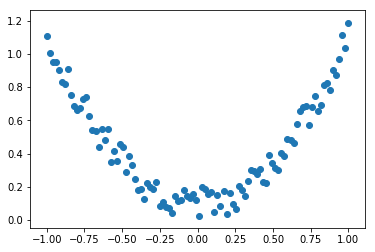

In [22]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# 画图
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [23]:
import torch
import torch.nn.functional as F     # 激励函数都在这

class Net(torch.nn.Module):  # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        # 定义每层用什么样的形式
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.predict = torch.nn.Linear(n_hidden, n_output)   # 输出层线性输出

    def forward(self, x):   # 这同时也是 Module 中的 forward 功能
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.predict(x)             # 输出值
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)

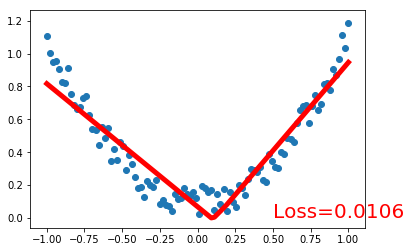

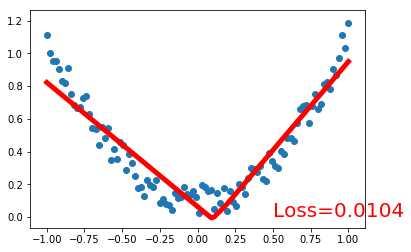

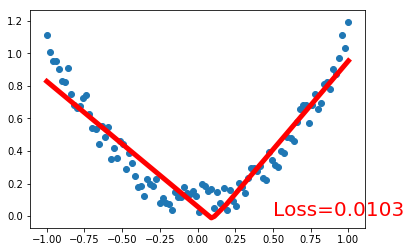

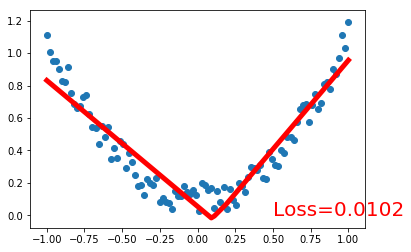

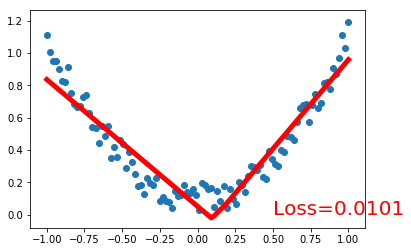

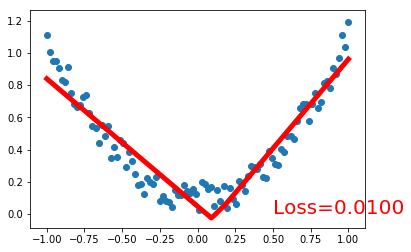

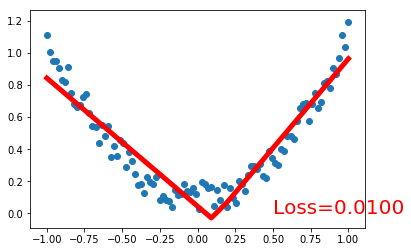

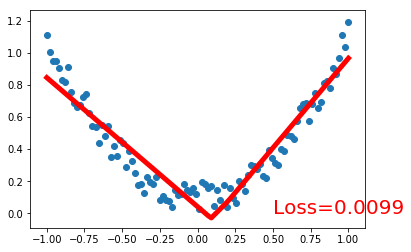

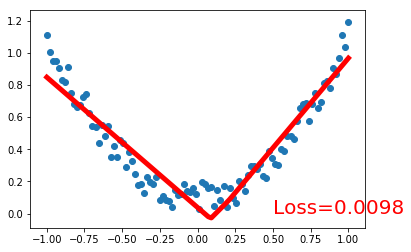

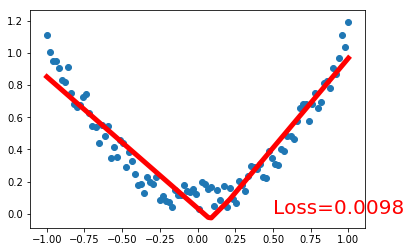

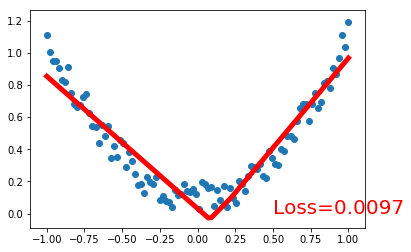

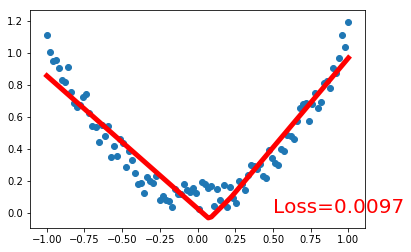

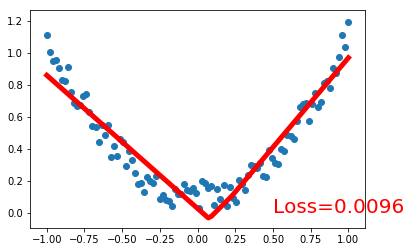

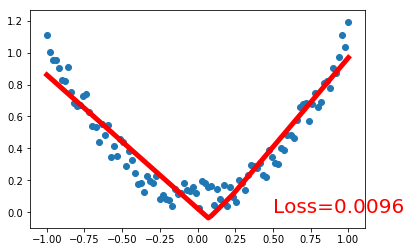

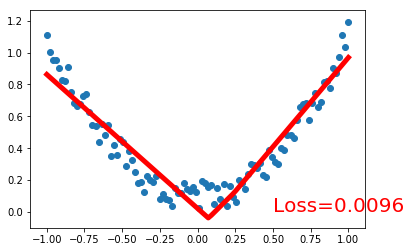

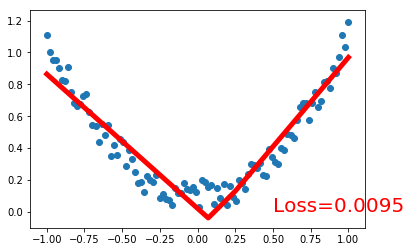

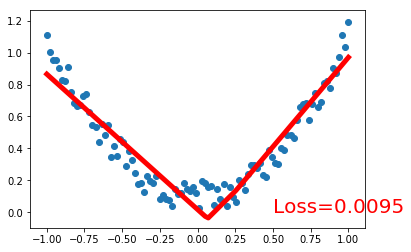

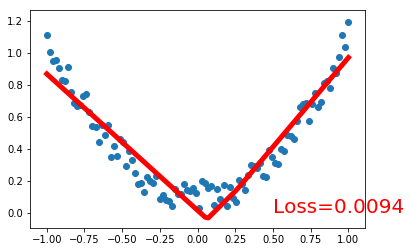

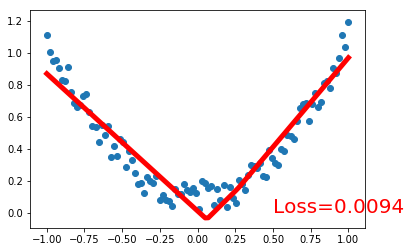

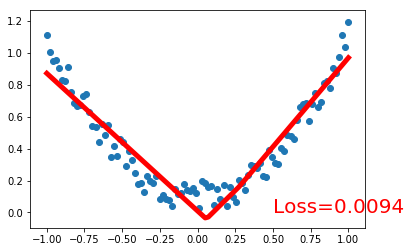

In [26]:
# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)  # 传入 net 的所有参数, 学习率
loss_func = torch.nn.MSELoss()      # 预测值和真实值的误差计算公式 (均方差)

for t in range(100):
    prediction = net(x)     # 喂给 net 训练数据 x, 输出预测值

    loss = loss_func(prediction, y)     # 计算两者的误差

    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上
    
    # 接着上面来
    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

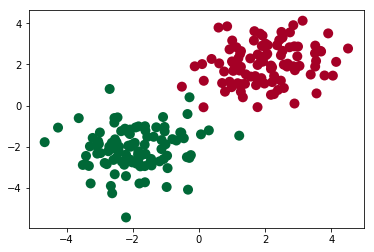

In [37]:
import torch
import matplotlib.pyplot as plt

# 假数据
n_data = torch.ones(100, 2)         # 数据的基本形态
x0 = torch.normal(2*n_data, 1)      # 类型0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # 类型0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # 类型1 x data (tensor), shape=(100, 1)
y1 = torch.ones(100)                # 类型1 y data (tensor), shape=(100, 1)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [38]:
class Net(torch.nn.Module):     # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.out = torch.nn.Linear(n_hidden, n_output)       # 输出层线性输出

    def forward(self, x):
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.out(x)                 # 输出值, 但是这个不是预测值, 预测值还需要再另外计算
        return x

net = Net(n_feature=2, n_hidden=10, n_output=2) # 几个类别就几个 output

/home/fengye/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


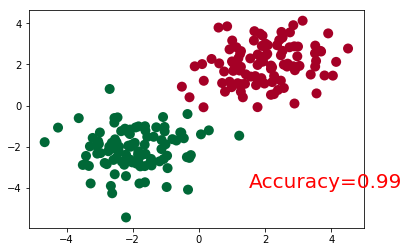

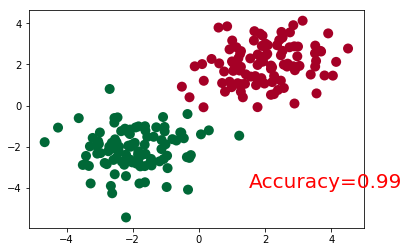

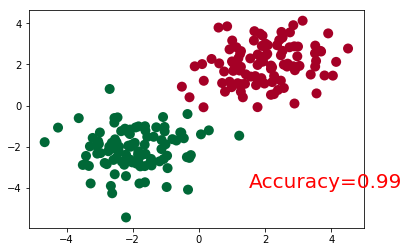

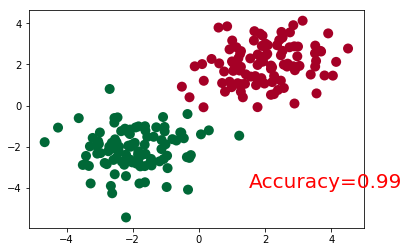

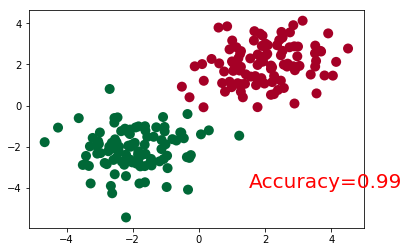

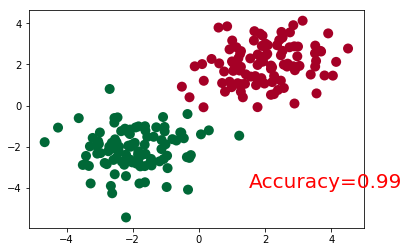

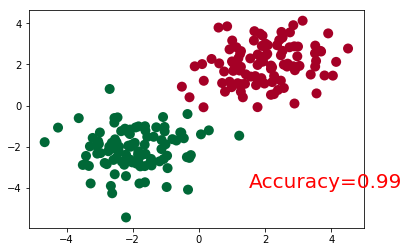

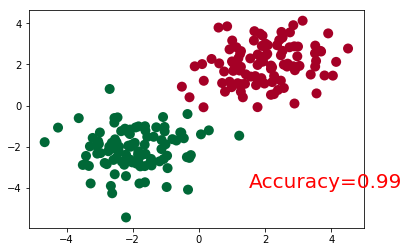

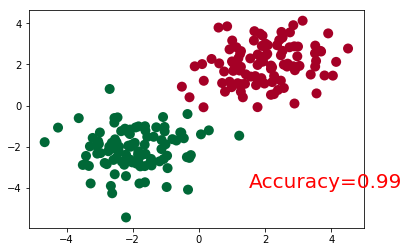

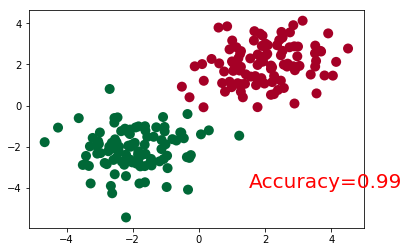

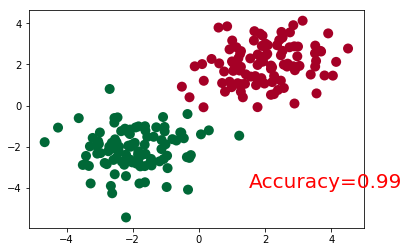

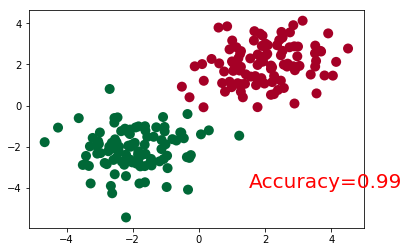

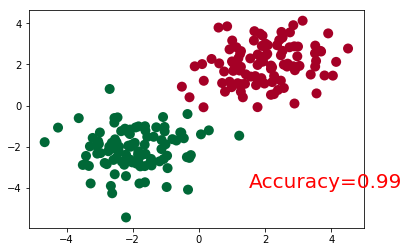

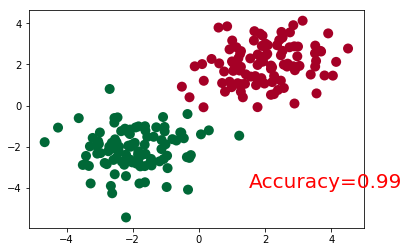

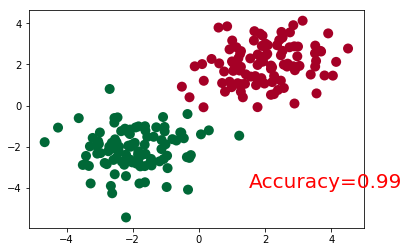

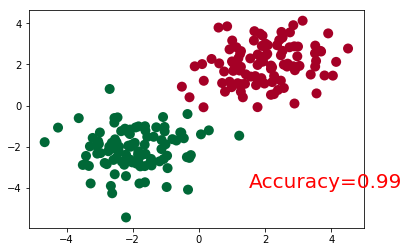

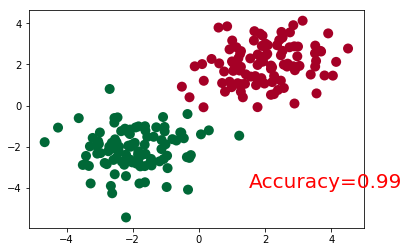

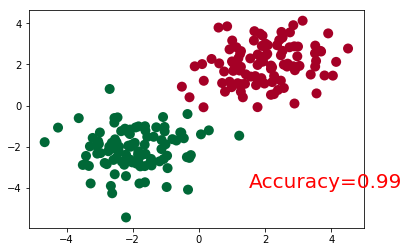

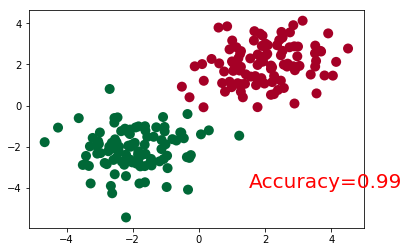

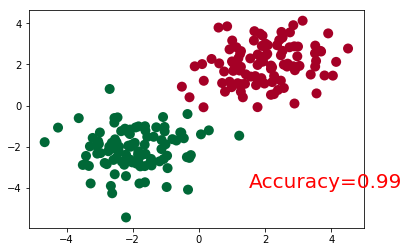

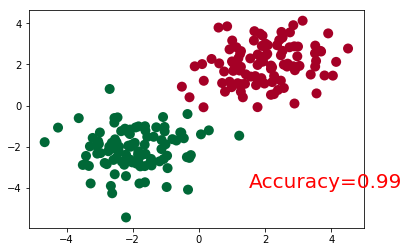

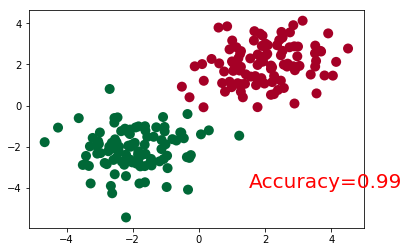

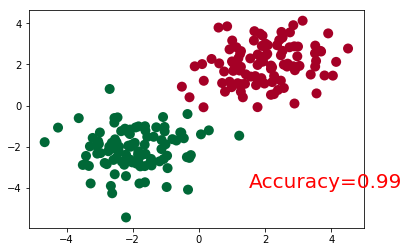

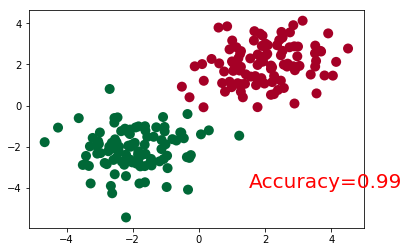

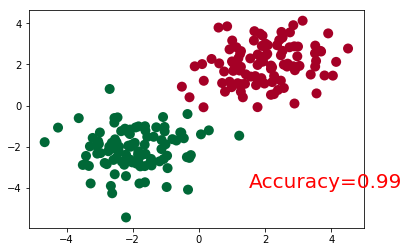

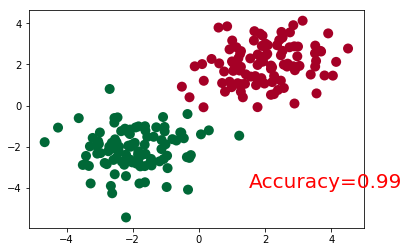

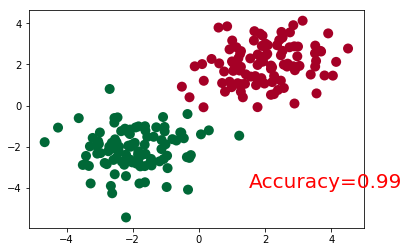

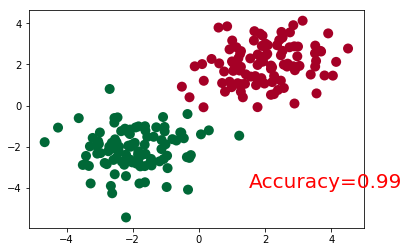

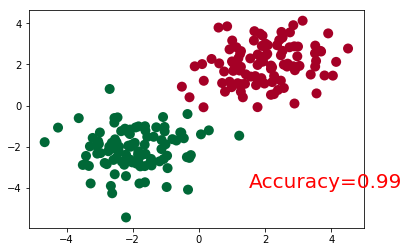

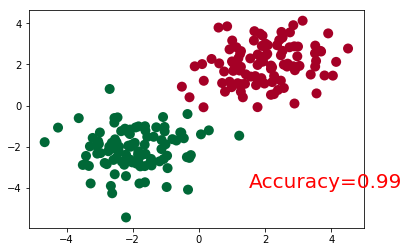

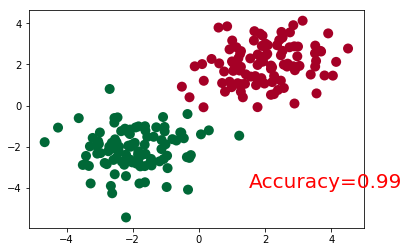

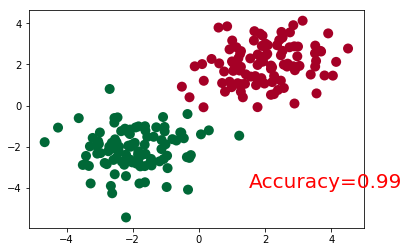

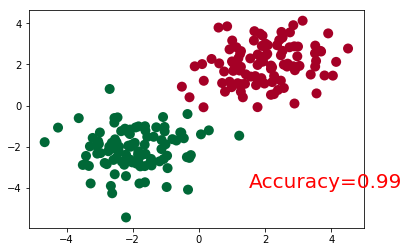

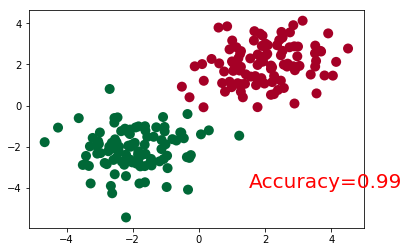

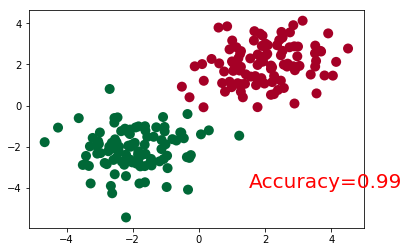

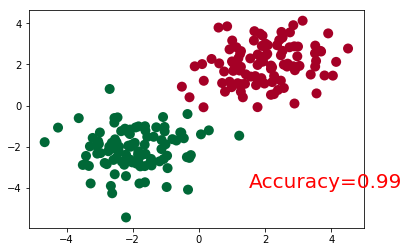

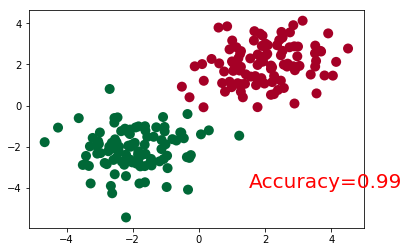

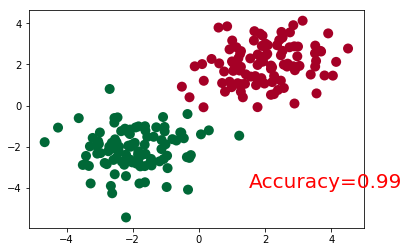

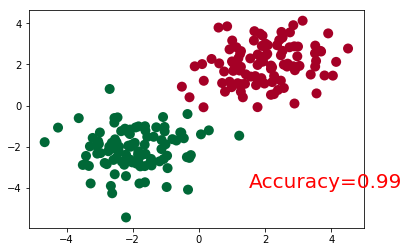

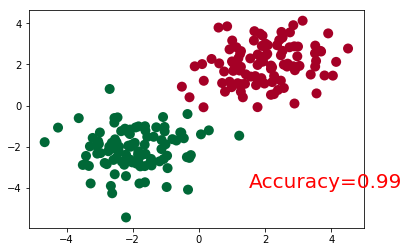

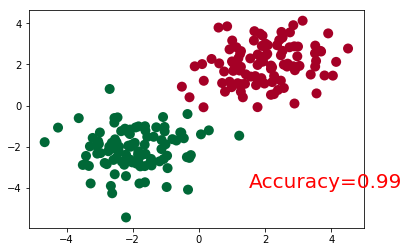

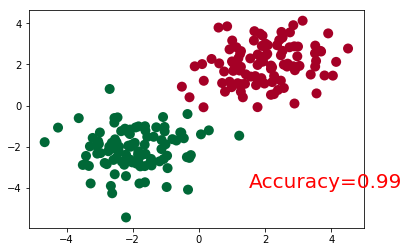

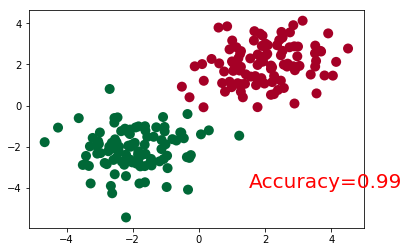

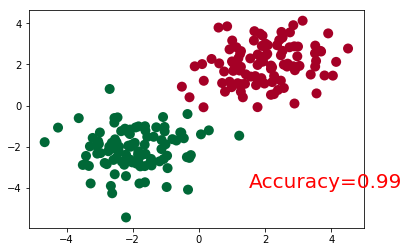

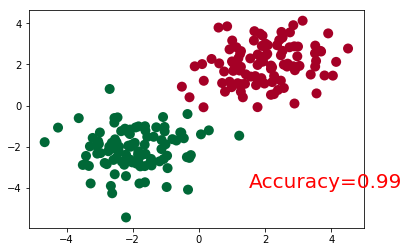

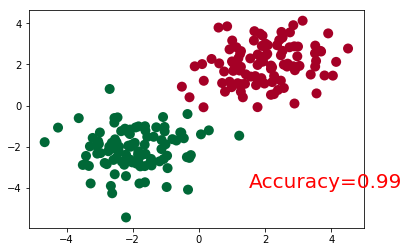

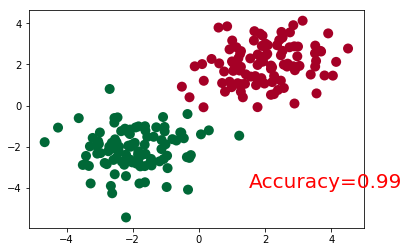

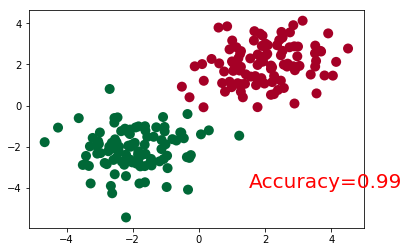

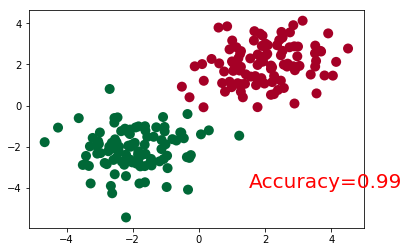

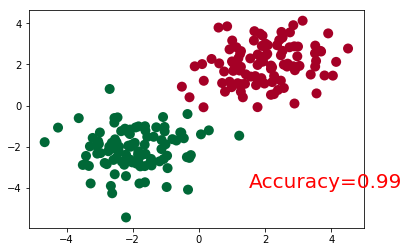

In [41]:
# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)  # 传入 net 的所有参数, 学习率
# 算误差的时候, 注意真实值!不是! one-hot 形式的, 而是1D Tensor, (batch,)
# 但是预测值是2D tensor (batch, n_classes)
loss_func = torch.nn.CrossEntropyLoss()

plt.ion()   # 画图
plt.show()

for t in range(100):
    out = net(x)     # 喂给 net 训练数据 x, 输出分析值

    loss = loss_func(out, y)     # 计算两者的误差

    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上
    # 接着上面来
    if t % 2 == 0:
        plt.cla()
        # 过了一道 softmax 的激励函数后的最大概率才是预测值
        prediction = torch.max(F.softmax(out), 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.  # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()  # 停止画图
plt.show()

In [67]:
torch.manual_seed(1)    # reproducible

# 假数据
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)

def save():
    # 建网络
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()

    # 训练
    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    torch.save(net1, 'net.pkl')  # 保存整个网络
    torch.save(net1.state_dict(), 'net_params.pkl')   # 只保存网络中的参数 (速度快, 占内存少)


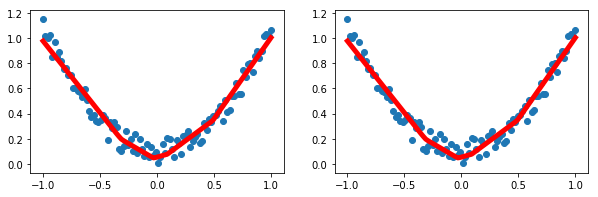

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

def restore_net():
    # restore entire net1 to net2
    net2 = torch.load('net.pkl')
    prediction = net2(x)
    
    axes[0].cla()
    axes[0].scatter(x.data.numpy(), y.data.numpy())
    axes[0].plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    
    
def restore_params():
    # 新建 net3
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )

    # 将保存的参数复制到 net3
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)
    
    axes[1].cla()
    axes[1].scatter(x.data.numpy(), y.data.numpy())
    axes[1].plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    
# 保存 net1 (1. 整个网络, 2. 只有参数)
save()

# 提取整个网络
restore_net()

# 提取网络参数, 复制到新网络
restore_params()